### Use the model to Identify your Own Hand-Written Digit :

In [1]:
from PIL import Image, ImageOps
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
digits = load_digits()

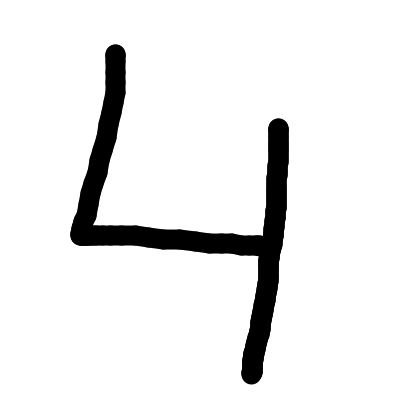

In [3]:
img = Image.open('four.png').convert('L')
img

In [4]:
# Resize the image to 8x8 pixels
img_resized = img.resize((8, 8))
img_resized

In [5]:
#invert the colors, black to white and white to black
img_inv = ImageOps.invert(img_resized)
img_inv

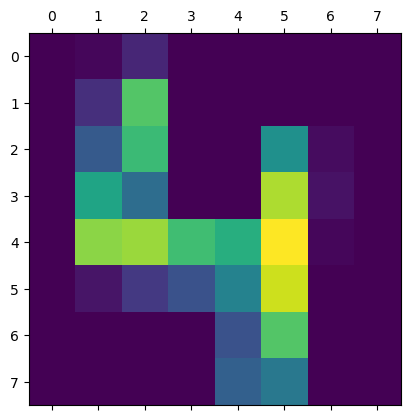

In [6]:
plt.matshow(img_inv)

In [7]:
#convert image into an array - gives 2D array
arr = np.array(img_inv)
arr

array([[  0,   2,  13,   0,   0,   0,   0,   0],
       [  0,  16,  88,   0,   0,   0,   0,   0],
       [  0,  34,  82,   0,   0,  60,   4,   0],
       [  0,  70,  43,   0,   0, 105,   6,   0],
       [  0,  99, 102,  83,  75, 120,   2,   0],
       [  0,   7,  20,  30,  53, 111,   0,   0],
       [  0,   0,   0,   0,  30,  88,   0,   0],
       [  0,   0,   0,   0,  37,  48,   0,   0]], dtype=uint8)

In [8]:
#convert above 2D into 1D array for prediction
arr1 = arr.flatten()
arr1

array([  0,   2,  13,   0,   0,   0,   0,   0,   0,  16,  88,   0,   0,
         0,   0,   0,   0,  34,  82,   0,   0,  60,   4,   0,   0,  70,
        43,   0,   0, 105,   6,   0,   0,  99, 102,  83,  75, 120,   2,
         0,   0,   7,  20,  30,  53, 111,   0,   0,   0,   0,   0,   0,
        30,  88,   0,   0,   0,   0,   0,   0,  37,  48,   0,   0],
      dtype=uint8)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3)
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [10]:
model.predict([arr1])

array([4])

Possible ValueError might occur: X has 160000 features, but LogisticRegression is expecting 64 features as input.

This discrepancy is likely because the input data is a flattened 1D array representing an image with a resolution of 400x400 pixels, resulting in 160,000 elements. However, the logistic regression model is trained on the digits dataset, where each image has a resolution of 8x8 pixels, resulting in 64 features.

To resolve this issue, you need to resize the input image to match the resolution of the images in the digits dataset (8x8 pixels) before making predictions. Once the image is resized, you can flatten it to a 1D array with 64 elements and then pass it to the model for prediction.